30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [21]:
data = list()

with open("neko.txt.mecab","r") as buffers:

    for l in buffers:

        '''
        - 各行についてスペースで分割してリスト化
        - 辞書に、それぞれをキーとして得られたリストのそれぞれの要素を追加
        - 全辞書を格納する配列に格納
        - 再就業に行った場合は抜け出す
        '''
        if l == 'EOS':
            break
        i = l.split("\t")
        d = dict()
        d = {'surface':i[0], 'base':i[3], 'pos':i[4], 'pos1':i[5]}
        data.append(d)

data[:10]

[{'surface': '一', 'base': '一', 'pos': '名詞-数詞', 'pos1': ''},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
 {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
 {'surface': 'は', 'base': 'は', 'pos': '助詞-係助詞', 'pos1': ''},
 {'surface': '猫', 'base': '猫', 'pos': '名詞-普通名詞-一般', 'pos1': ''},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '助動詞-ダ'},
 {'surface': 'ある', 'base': '有る', 'pos': '動詞-非自立可能', 'pos1': '五段-ラ行'},
 {'surface': '。', 'base': '。', 'pos': '補助記号-句点', 'pos1': ''},
 {'surface': '名前', 'base': '名前', 'pos': '名詞-普通名詞-一般', 'pos1': ''},
 {'surface': 'は', 'base': 'は', 'pos': '助詞-係助詞', 'pos1': ''}]

31. 動詞

動詞の表層形をすべて抽出せよ．

In [22]:
doushi = list()

for i in data:

    # リスト内の全辞書に対して品詞が動詞のものを抜き出してリスト化
    if '動詞' in i['pos']:
        doushi.append(i)

doushi[:10]

[{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '助動詞-ダ'},
 {'surface': 'ある', 'base': '有る', 'pos': '動詞-非自立可能', 'pos1': '五段-ラ行'},
 {'surface': '生れ', 'base': '生まれる', 'pos': '動詞-一般', 'pos1': '下一段-ラ行'},
 {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '助動詞-タ'},
 {'surface': 'んと', 'base': 'うんと', 'pos': '感動詞-フィラー', 'pos1': ''},
 {'surface': 'つか', 'base': '付く', 'pos': '動詞-非自立可能', 'pos1': '五段-カ行'},
 {'surface': 'ぬ', 'base': 'ず', 'pos': '助動詞', 'pos1': '助動詞-ヌ'},
 {'surface': 'し', 'base': '為る', 'pos': '動詞-非自立可能', 'pos1': 'サ行変格'},
 {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '助動詞-タ'},
 {'surface': '泣い', 'base': '泣く', 'pos': '動詞-一般', 'pos1': '五段-カ行'}]

32. 動詞の原形

動詞の基本形をすべて抽出せよ．

In [23]:
doushi_base = list()

for i in doushi:

    # 先ほどの動詞リストについて、基本形を抜き出す
    doushi_base.append(i['base'])

doushi_base[:10]

['だ', '有る', '生まれる', 'た', 'うんと', '付く', 'ず', '為る', 'た', '泣く']

33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [24]:
A_no_B = list()

for i in range(2,len(data)):

    # 「名詞 + の + 名詞」 となる場合のみ、抜き出してリスト化
    if '名詞' in data[i-2]['pos'] and 'の' in data[i-1]['surface'] and '助詞' in data[i-1]['pos'] and '名詞' in data[i]['pos']:
        A_no_B.append(data[i-2]['surface']+data[i-1]['surface']+data[i]['surface'])

A_no_B[-10:]

['烏の代り', '吾輩の足', '水の面', '甕の縁', '甕のふち', '年の間', '自然の力', '水の中', '座敷の上', '不可思議の太平']

34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [25]:
nameoflist = list()
sum = list()

for i in data:

    '''
    - もし名詞が見つかった場合はsumに追加
    - 見つからなかった場合は、sumの中身がある限りnameoflistに追加
    '''
    if '名詞' in i['pos']: 
        sum.append(i['surface'])
    else:
        if len(sum) > 0: 
            nameoflist.append(sum)
        sum = list()

# 一番長いやつを出す
''.join(max(nameoflist, key=lambda x: len(x)))

'明治三十八年何月何日戸締り'

35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [26]:
# 標準ライブラリのCounter
from collections import Counter

# 出現単語をカウントし、多い順に並べたものをタプルで保持
# 上位20単語を表示
common = Counter([d['surface'] for d in data]).most_common()
common[:20]

[('の', 9543),
 ('。', 7486),
 ('て', 7417),
 ('に', 7058),
 ('、', 6773),
 ('は', 6501),
 ('と', 6157),
 ('を', 6119),
 ('が', 5395),
 ('で', 4543),
 ('た', 3974),
 ('も', 3238),
 ('「', 3238),
 ('」', 3238),
 ('だ', 2705),
 ('し', 2528),
 ('ない', 2423),
 ('から', 2213),
 ('か', 2040),
 ('ある', 1730)]

36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12390 (\N{HIRAGANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWa

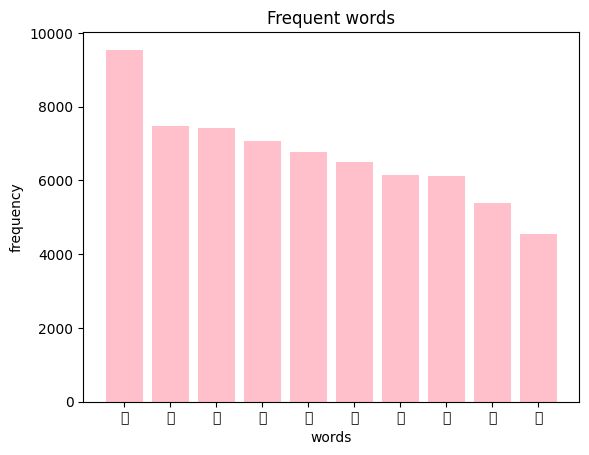

In [27]:
import matplotlib.pyplot as plt

x_values = list()
y_values = list()

for i in common[:10]:

    # 頻度が高い10語を取得
    # 単語をX軸、その頻度をY軸に設定
    x_values.append(i[0])
    y_values.append(i[1])

# 色はピンク、タイトルはFrequent words、ラベル名もそれぞれ設定しグラフ表示
plt.bar(x_values, y_values, color='pink')
plt.title('Frequent words')
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()


37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12384 (\N{HIRAGANA LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


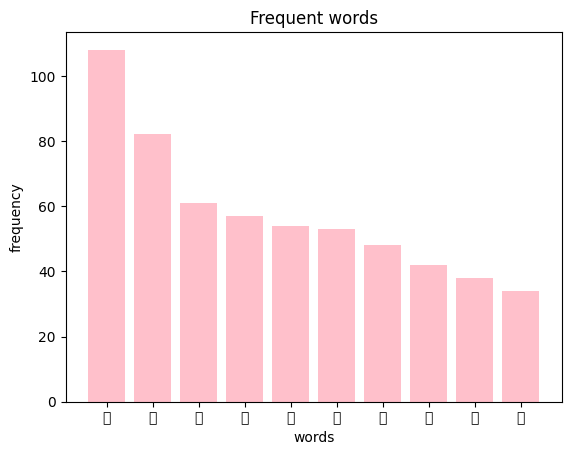

In [28]:
# 'data' リストから各辞書の 'surface' 値を抽出
# 共起分析する対象の単語
surface = [d['surface'] for d in data]
target_word = "猫"

co_occurrences = []

for i, word in enumerate(surface):

    # 現在の単語が対象の単語であるかを確認
    if word == target_word:

        '''
        - ターゲット言語の周辺にウィンドウを設定
        - ウィンドウ内の単語を抽出(context_words)し、co_occurrencesに追加
        '''
        window_start = max(0, i - 3)
        window_end = min(len(surface), i + 4)
        context_words = surface[window_start:i] + surface[i+1:window_end]
        co_occurrences.extend(context_words)

# 出現単語をカウントし、多い順に並べたものをタプルで保持
co_occurrence_counts = Counter(co_occurrences).most_common()

x_values = list()
y_values = list()

for i in co_occurrence_counts[:10]:
    
    # 頻度が高い10語を取得
    # 単語をX軸、その頻度をY軸に設定
    x_values.append(i[0])
    y_values.append(i[1])

# 棒グラフとして表示
plt.bar(x_values, y_values, color='pink')
plt.title('Frequent words')
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

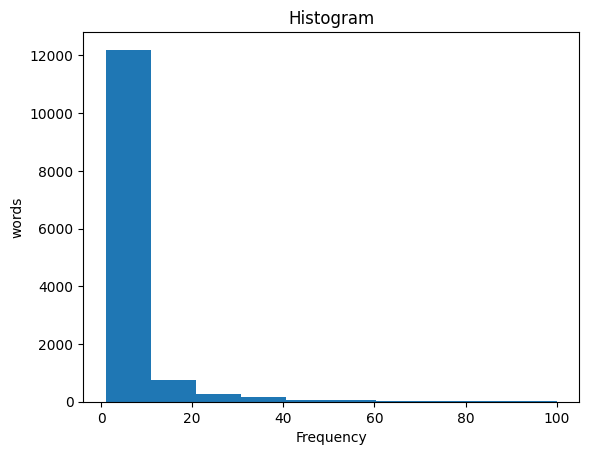

In [38]:
x_values = list()

for i in common:
    x_values.append(i[1])

# Y軸は出現頻度とし、ヒストグラムで表す
plt.hist(x_values,range=(1,100))
plt.title('Histogram')
plt.xlabel('Frequency')
plt.ylabel('words')
plt.show()

39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

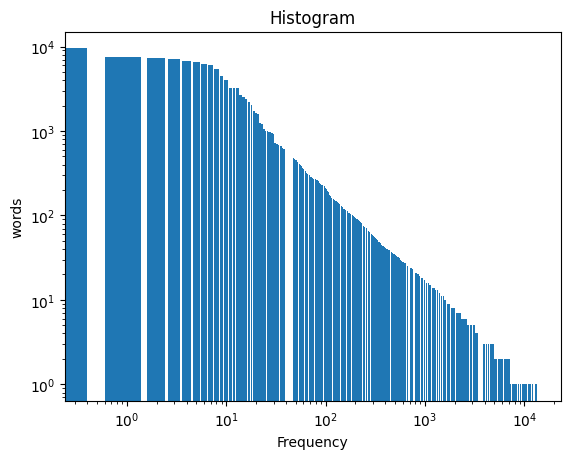

In [35]:
x_values = list()
y_values = list()

for index,i in enumerate(common):
    x_values.append(index)
    y_values.append(i[1])

# 先ほどのグラフについて、両軸のメモリスケールをlogに変更して表示
plt.bar(x_values, y_values)
plt.yscale('log')
plt.xscale('log')
plt.title('Histogram')
plt.xlabel('Frequency')
plt.ylabel('words')
plt.show()